# Spread simulation using CA

We can simulate the spread of a virus disease using cellular automata, defining SIR model assumptions when programming the neighbourhood update function. That way we should be able to obtain the SIR model functions data, and thus compute beta and gamma values.

I'm using the *cellpylib* module for this demonstration, it implements common CA operations using numpy thus achieving higher speed in computation (which are quite power hungry).

Let's start by importing the dependencies.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cellpylib as cpl
import random
from ipywidgets import interact, FloatSlider, IntSlider

A neighbourhood represents the basic CA data structure, *cpl* represents is using a numpy array.

In [11]:
sandbox = cpl.init_simple2d(100, 100)    #Create new CA of dimensions 100x100

SIR model defines two constants values, beta and gamma, used to compute the number of infected and recovered people every day.
Let's choose a value.

In [4]:
trSlider = FloatSlider(value=0.055,min=0,max=1.5,step=0.001,description='Transmission rate:',orientation='horizontal',readout=True,readout_format='.3f')
trSlider

FloatSlider(value=0.055, description='Transmission rate:', max=1.5, readout_format='.3f', step=0.001)

In [5]:
rrSlider = FloatSlider(value=0.045,min=0,max=1.5,step=0.001,description='Recovery rate:',orientation='horizontal',readout=True,readout_format='.3f')
rrSlider

FloatSlider(value=0.045, description='Recovery rate:', max=1.5, readout_format='.3f', step=0.001)

In [6]:
transmission_rate = trSlider.value
recovery_rate = rrSlider.value

In order to update the model every timeslice we must define a rule. We define three constants representing susceptible, infectious and recovered people.

The rule takes the current neighbourhood state (ndarray), coordinates of current cell (bi-tuple), current timestep.

In [7]:
SUSCEPTIBLE = 0
INFECTIOUS = 1
RECOVERED = 2

def virus_spread_rule(neighbourhood, c, t):
    cell = neighbourhood[1][1]

    if cell == SUSCEPTIBLE:
        infectious_neighs = np.count_nonzero(neighbourhood == INFECTIOUS)
        comp_risk = infectious_neighs * random.random()
        if comp_risk >= transmission_rate:
            return INFECTIOUS
        else:
            return SUSCEPTIBLE

    elif cell == INFECTIOUS:
        if random.random() >= recovery_rate:
            return RECOVERED
        else:
            return INFECTIOUS

    else:
        return RECOVERED

Every day a percentage of people gets infected, and another percentage recovers from the virus and don't spread it any further.

Now let our sandboxed model evolve using the rule we defined earlier. We use the function *evolve2d* and we pass the timesteps (days) to perform the evolution.

In [8]:
tsSlider = IntSlider(value=30,min=1,max=1000,step=1,description='Timesteps:',readout=True,readout_format='d')
tsSlider

IntSlider(value=30, description='Timesteps:', max=1000, min=1)

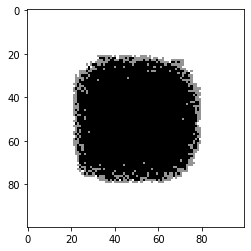

In [12]:
sandbox = cpl.evolve2d(sandbox, timesteps=tsSlider.value, neighbourhood='Moore',apply_rule=virus_spread_rule)
#Moore neighbourhood type represents the 8 immediate neighbours for each cell

cpl.plot2d(sandbox)

We can extract SIR functions values using numpy facilities.

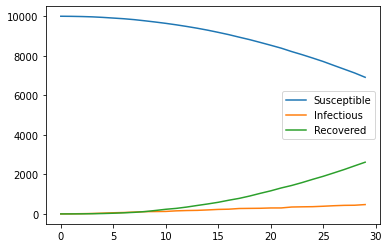

In [10]:
sir = []
for timeslice in sandbox:
    s = np.count_nonzero(timeslice == SUSCEPTIBLE)
    i = np.count_nonzero(timeslice == INFECTIOUS)
    r = np.count_nonzero(timeslice == RECOVERED)
    sir.append((s,i,r))
    
plt.plot(sir)
plt.legend(('Susceptible', 'Infectious', 'Recovered'))
plt.show()